In [2]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import cifar10

In [5]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
type(xtrain)

numpy.ndarray

In [7]:
xtrain.shape

(50000, 32, 32, 3)

array([[[162, 164, 130],
        [164, 167, 128],
        [169, 171, 131],
        ...,
        [184, 176, 137],
        [190, 186, 146],
        [202, 198, 161]],

       [[153, 151, 119],
        [158, 156, 120],
        [164, 163, 124],
        ...,
        [178, 171, 131],
        [189, 184, 143],
        [201, 198, 158]],

       [[157, 151, 120],
        [161, 156, 121],
        [164, 160, 122],
        ...,
        [178, 170, 131],
        [190, 186, 142],
        [202, 199, 156]],

       ...,

       [[214, 205, 193],
        [213, 193, 181],
        [213, 185, 174],
        ...,
        [240, 207, 193],
        [241, 206, 194],
        [242, 209, 196]],

       [[218, 209, 198],
        [209, 188, 176],
        [208, 180, 169],
        ...,
        [232, 195, 182],
        [236, 196, 185],
        [239, 200, 187]],

       [[216, 204, 197],
        [207, 189, 178],
        [201, 174, 156],
        ...,
        [231, 192, 178],
        [233, 194, 181],
        [235, 198, 183]]], dtype=uint8)
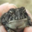

In [16]:
xtrain[25]

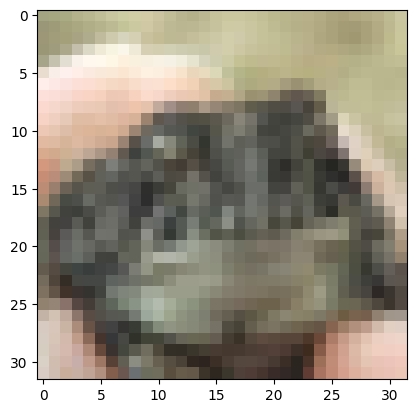

In [17]:
img0=plt.imshow(xtrain[25])

In [18]:
lab1=ytrain[25]
print(lab1)

[6]


In [19]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [23]:
print('image class is:',classification[ytrain[25][0]])

image class is: frog


In [24]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [25]:
xtrain=xtrain/255
xtest=xtest/255

In [27]:
xtrain[25]

array([[[0.63529412, 0.64313725, 0.50980392],
        [0.64313725, 0.65490196, 0.50196078],
        [0.6627451 , 0.67058824, 0.51372549],
        ...,
        [0.72156863, 0.69019608, 0.5372549 ],
        [0.74509804, 0.72941176, 0.57254902],
        [0.79215686, 0.77647059, 0.63137255]],

       [[0.6       , 0.59215686, 0.46666667],
        [0.61960784, 0.61176471, 0.47058824],
        [0.64313725, 0.63921569, 0.48627451],
        ...,
        [0.69803922, 0.67058824, 0.51372549],
        [0.74117647, 0.72156863, 0.56078431],
        [0.78823529, 0.77647059, 0.61960784]],

       [[0.61568627, 0.59215686, 0.47058824],
        [0.63137255, 0.61176471, 0.4745098 ],
        [0.64313725, 0.62745098, 0.47843137],
        ...,
        [0.69803922, 0.66666667, 0.51372549],
        [0.74509804, 0.72941176, 0.55686275],
        [0.79215686, 0.78039216, 0.61176471]],

       ...,

       [[0.83921569, 0.80392157, 0.75686275],
        [0.83529412, 0.75686275, 0.70980392],
        [0.83529412, 0

In [28]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))


In [46]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 62s 396ms/step - loss: 1.4365 - accuracy: 0.4751 - val_loss: 1.3688 - val_accuracy: 0.5077
Epoch 2/10
157/157 [==============================] - 57s 365ms/step - loss: 1.2896 - accuracy: 0.5310 - val_loss: 1.2355 - val_accuracy: 0.5581
Epoch 3/10
157/157 [==============================] - 57s 365ms/step - loss: 1.1670 - accuracy: 0.5824 - val_loss: 1.1454 - val_accuracy: 0.5926
Epoch 4/10
157/157 [==============================] - 57s 364ms/step - loss: 1.0653 - accuracy: 0.6202 - val_loss: 1.0443 - val_accuracy: 0.6347
Epoch 5/10
157/157 [==============================] - 56s 355ms/step - loss: 1.0028 - accuracy: 0.6453 - val_loss: 1.0149 - val_accuracy: 0.6504
Epoch 6/10
157/157 [==============================] - 58s 370ms/step - loss: 0.9389 - accuracy: 0.6662 - val_loss: 0.9847 - val_accuracy: 0.6565
Epoch 7/10
157/157 [==============================] - 56s 355ms/step - loss: 0.8601 - accuracy: 0.6966 - val_loss: 0.9375 - val_ac

In [64]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 6s 19ms/step - loss: 0.9175 - accuracy: 0.6851


[0.9175342917442322, 0.6851000189781189]

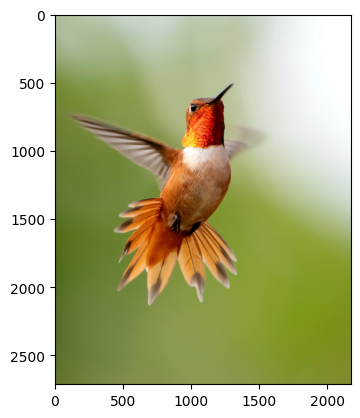

In [53]:
cat = plt.imread('/content/pexels-frank-cone-2629372.jpg')
plt.imshow(cat)

In [54]:
from skimage import transform

In [56]:
resize = transform.resize(cat,(32,32,3))

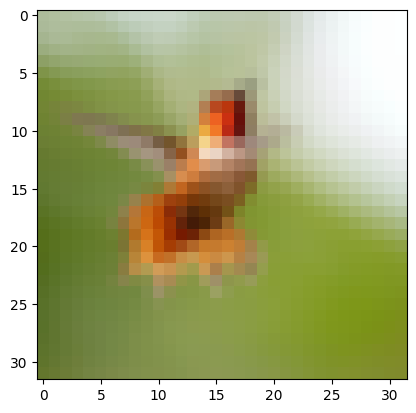

In [57]:
plt.imshow(resize)

In [58]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 200ms/step
[[0.17683846 0.00874257 0.18109383 0.04402337 0.26825207 0.03749258
  0.03820023 0.18078539 0.03848255 0.02608892]]


In [60]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

[4, 2, 7, 0, 3, 8, 6, 5, 9, 1]


In [61]:
for i in range(5):
  print(classification[list_index[i]])

deer
bird
horse
airplane
cat
